**ISYA 2024, Solar Physics**

# Sunpy and AIA data

[Sunpy](https://www.sunpy.org) is an open source Python package for solar physics. It allows you to interact, visualise and analyse different types of solar data. Here we will use it to work with AIA data. In this practical example we will search for, download, and do some basic analysis of solar data obtained by NASA's [Solar Dynamics Observatory](https://sdo.gsfc.nasa.gov/), in particular the Atmospheric Imaging Assembly (AIA) instrument. AIA observes the Sun in multiple UV wavelengths, taking 4k by 4k images with a spatial resolution of 1 arcsec every 12 seconds.

This notebook provides all the code and there are no questions to answer. Running it will require downloading data, which may be slow depending on your connection. If you don't manage to run it at the school, feel free to run it later at your own pace.

## Header and imports

You need to have installed `astropy` and `sunpy` to run this notebook. If you can run the cell below without errors, you should be good to go!

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

import numpy
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

from astropy import units as u
from astropy.coordinates import SkyCoord
import sunpy.map
from sunpy.net import Fido, attrs as a

plt.rc('legend', frameon=False)
plt.rc('figure', figsize=(10, 8))  # Larger figure sizes

## Searching and downloading data

Now the next step is to actually get some data! We are going to use Sunpy to download some AIA data. There are several ways of acquiring data with Sunpy, and here we will use [Fido](http://docs.sunpy.org/en/stable/guide/acquiring_data/fido.html) to query the [Virtual Solar Observatory](https://sdac.virtualsolar.org/cgi/search) (VSO). 

First we do a search to find out what AIA data are available on a time range, and the 171 channel:

In [2]:
# this not to run, just to get data
result = Fido.search(a.Time('2014-09-19T05:59:00', '2014-09-19T06:01:00'),
                     a.Instrument("aia"), a.Wavelength(171*u.angstrom),
                     a.Sample(12*u.second))
result

Start Time,End Time,Source,Instrument,Wavelength,Provider,Physobs,Wavetype,Extent Width,Extent Length,Extent Type,Size
,,,,Angstrom,,,,,,,Mibyte
Time,Time,str3,str3,float64[2],str4,str9,str6,str4,str4,str8,float64
2014-09-19 05:59:11.000,2014-09-19 05:59:12.000,SDO,AIA,171.0 .. 171.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,64.64844
2014-09-19 05:59:23.000,2014-09-19 05:59:24.000,SDO,AIA,171.0 .. 171.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,64.64844
2014-09-19 05:59:35.000,2014-09-19 05:59:36.000,SDO,AIA,171.0 .. 171.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,64.64844
2014-09-19 05:59:47.000,2014-09-19 05:59:48.000,SDO,AIA,171.0 .. 171.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,64.64844
2014-09-19 05:59:59.000,2014-09-19 06:00:00.000,SDO,AIA,171.0 .. 171.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,64.64844
2014-09-19 06:00:11.000,2014-09-19 06:00:12.000,SDO,AIA,171.0 .. 171.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,64.64844
2014-09-19 06:00:23.000,2014-09-19 06:00:24.000,SDO,AIA,171.0 .. 171.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,64.64844
2014-09-19 06:00:35.000,2014-09-19 06:00:36.000,SDO,AIA,171.0 .. 171.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,64.64844


In the above we used `a.Sample(12*u.second)`, to make sure that the search looks for all images with a 12 second cadence (maximum for AIA). In this two minute interval, we see several observations but the cadence is not 12 seconds but around 36 seconds. This is because not all channels are exposed simultaneously (there are 10 channels and only 4 telescopes, so AIA cycles through the channels). 

So far have only queried the database. Now, let us download the file closest to 06:00 (4th in sequence):

In [3]:
file_download = Fido.fetch(result[0, 3])

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Fido downloads the file(s) to a directory in your hard drive, typically in `~/sunpy/data`. The locations of the file(s) are saved on the list `file_download`. In this case, it is:

In [4]:
file_download

['/Users/tiago/sunpy/data/aia_lev1_171a_2014_09_19t05_59_47_34z_image_lev1.fits']

Now let us load this file using `Sunpy.map` and check its metadata:

Observatory,SDO
Instrument,AIA 3
Detector,AIA
Measurement,171.0 Angstrom
Wavelength,171.0 Angstrom
Observation Date,2014-09-19 05:59:47
Exposure Time,2.000191 s
Dimension,[4096. 4096.] pix
Coordinate System,helioprojective
Scale,[0.599489 0.599489] arcsec / pix
Reference Pixel,[2052. 2048.100098] pix

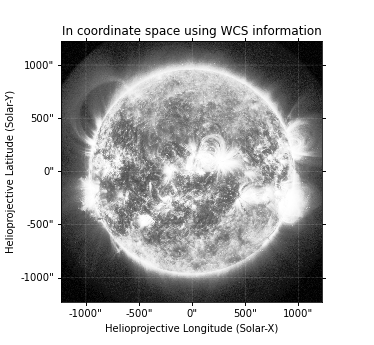
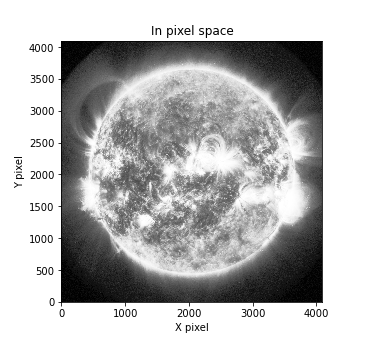
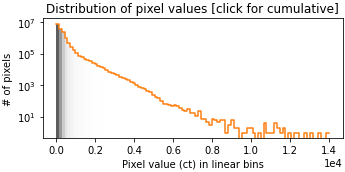
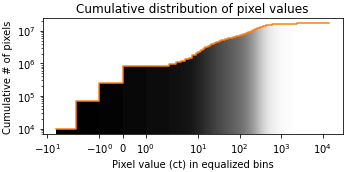

In [5]:
aia1 = sunpy.map.Map(file_download[0])
aia1

## Working with Map objects

We can now have a look at the data with the `.plot()` method:

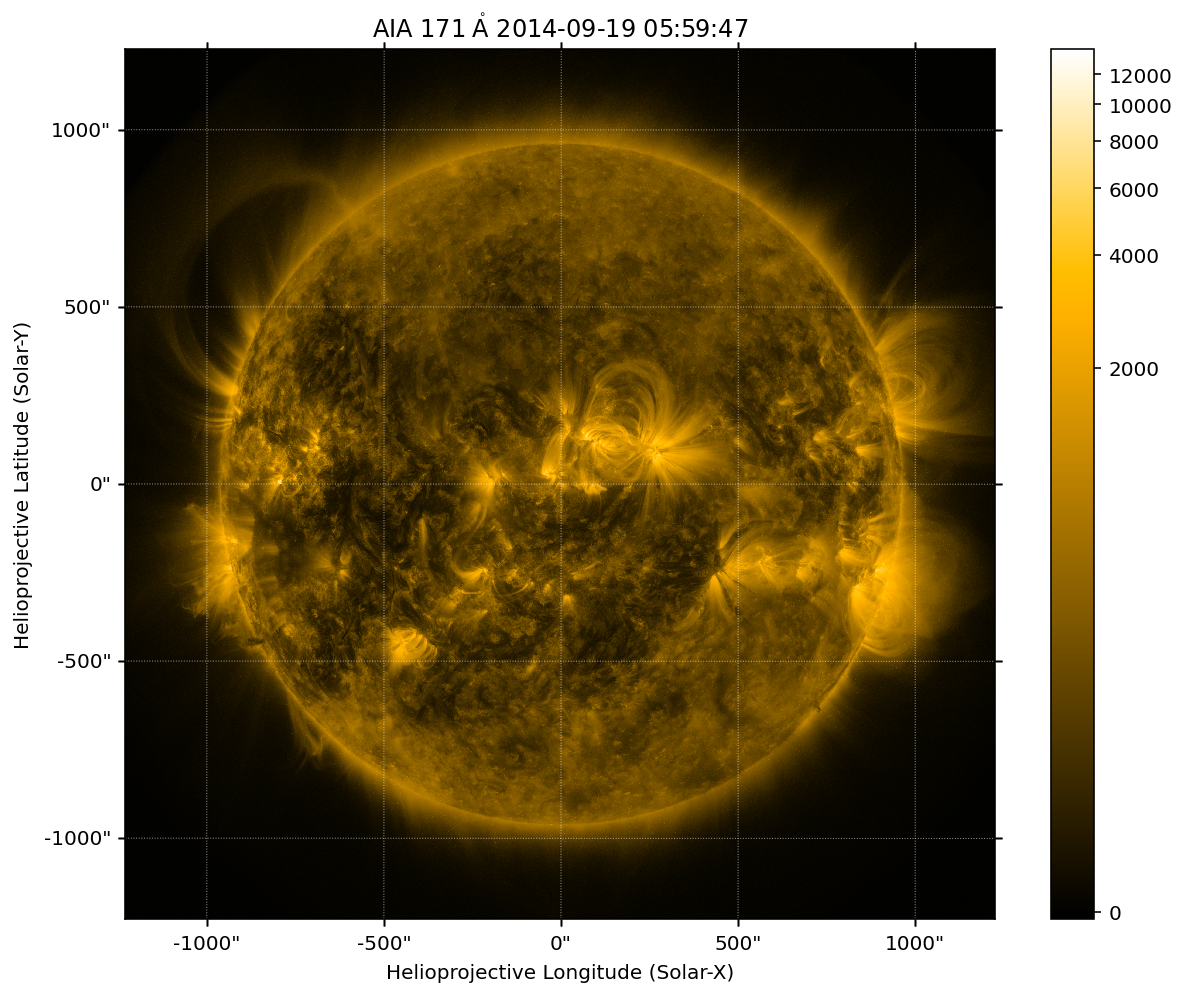

In [6]:
aia1.plot()
plt.colorbar();

We can now see the whole Sun at 17.1 nm on the chosen date. The `.plot()` method does several things in the background. It not only plots the image data, but also sets the image scale to be solar (x, y) coordinates, and automatically scales the image in a log scale (see color bar on left). 

Alternatively, we can also plot the image manually using matplotlib's `imshow()`:

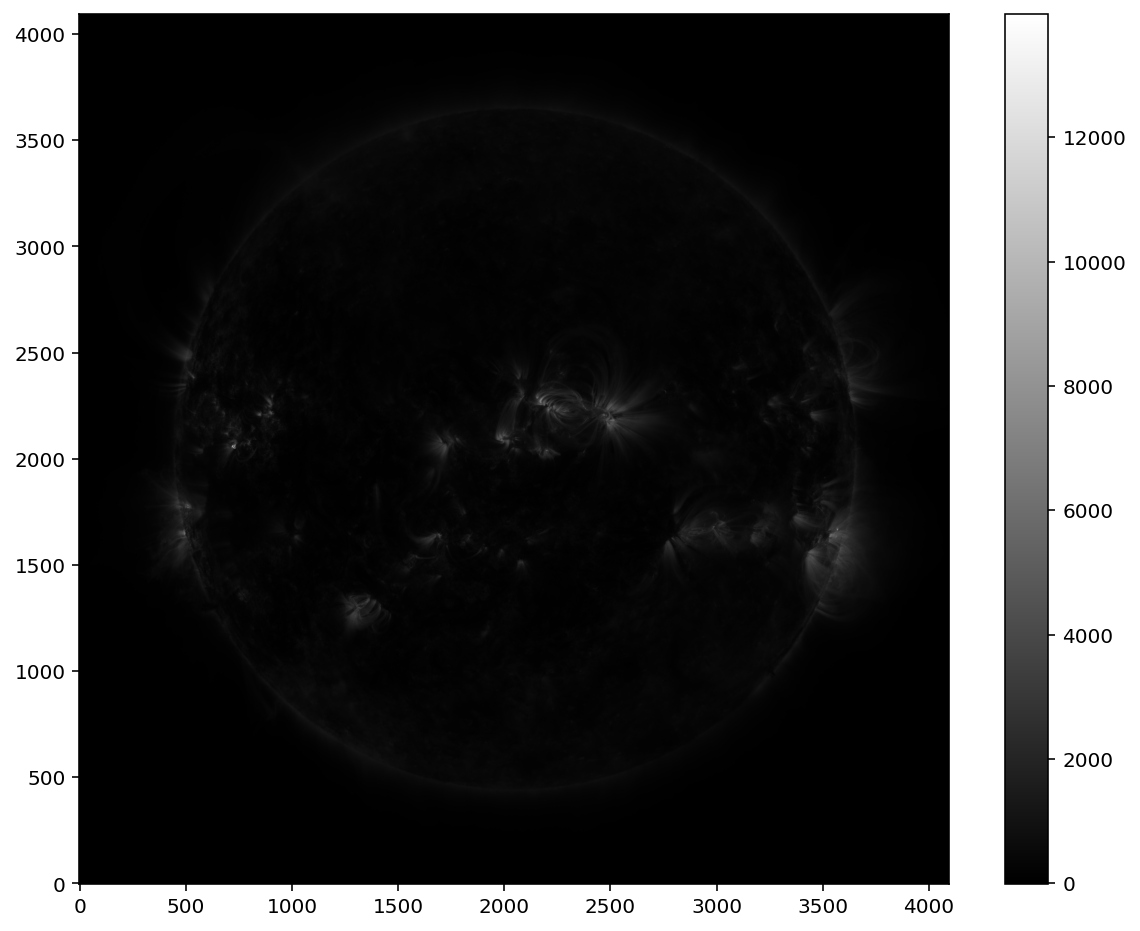

In [7]:
fig, ax = plt.subplots()
plt.imshow(aia1.data, cmap='gist_gray')
plt.colorbar()

This basic plot lacks many of the useful features of Sunpy. We have the axes in pixels and not coordinates, linear scale, and a black and white colormap. 

You can read more about how to use `Sunpy.map` and plotting in [Sunpy's map tutorial](https://docs.sunpy.org/en/stable/tutorial/maps.html).

Can you find two sunspots in the 171 image? At this time there were two sunspots visible in the Sun. But you will hardly find them in the 171 image. This is because these images sample the Corona at almost 1 million K. This is well above the visible surface, which is where sunspots are better seen. More on this later.


## Working with coordinates

Different coordinate systems exist for celestial bodies. On Earth, we are used to a [Geographic coordinate system](https://en.wikipedia.org/wiki/Geographic_coordinate_system) where a fixed location can always be located by longitude and latitude (e.g. Oslo is always at 59°55′0″N 10°44′0″E). The Sun is also approximately spherical, so we could similarly use *Heliographic* coordinates. However, these have several issues that make their general use difficult:

*  As seen in the 171 image, many solar features such as jets and loops extend beyond the surface, so besides latitude and longitude we also need radius to describe a point, leading to projection effects
* Unlike Earth, the Sun does not rotate as a solid body, it has *differential rotation*, meaning the equator rotates faster than the poles.  Therefore, points are not really fixed at different latitudes.

The most used solar coordinates are instead *Helioprojective* cartesian, or solar XY coordinates. In these coordinates, the Sun is projected into an (x, y) plane as seen from Earth. The origin of this system is the solar disk centre, and they are typically in units of arcsecond (″). With the solar radius being 959″.63, the range of solar XY coordinates is typically from -1000″ to 1000″. You can read more about [solar coordinate systems](https://www.aanda.org/articles/aa/pdf/2006/14/aa4262-05.pdf).

In astronomy, coordinate systems are described by the [World Coordinate System](https://fits.gsfc.nasa.gov/fits_wcs.html) (WCS), and in Python this is handled by astropy's [WCS module](http://docs.astropy.org/en/stable/wcs/). The FITS files from AIA and IRIS have the coordinate information written as WCS metadata, which are then read by Sunpy to plot the correct coordinate axes in `.plot()`. Any transformation to the data is then aware of the coordinates. For example, we can rotate our Sunpy map by 45° and see what happens with the output:

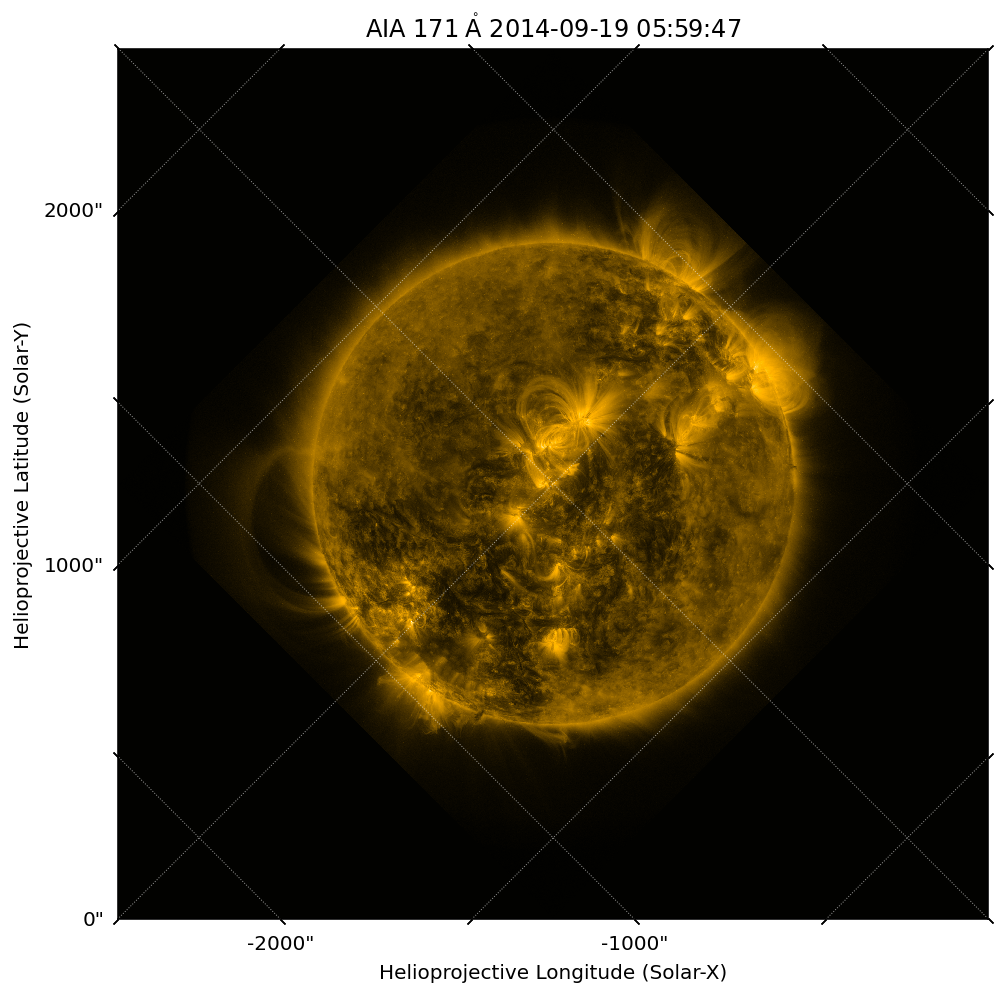

In [8]:
aia_rot = aia1.rotate(45 * u.deg, missing=0)
aia_rot.plot();

Now the image has rotated, but so have the coordinates. This takes a while because the original image is huge (4096x4096), and the output is even larger. In fact, these AIA images are so large that when looking at the full disk we don't see the many small details. Sunpy allows us to create a submap, a subregion of a map. We can select this solar coordinates, and need to define the bottom left and top right corner coordinates of the region we want to select:

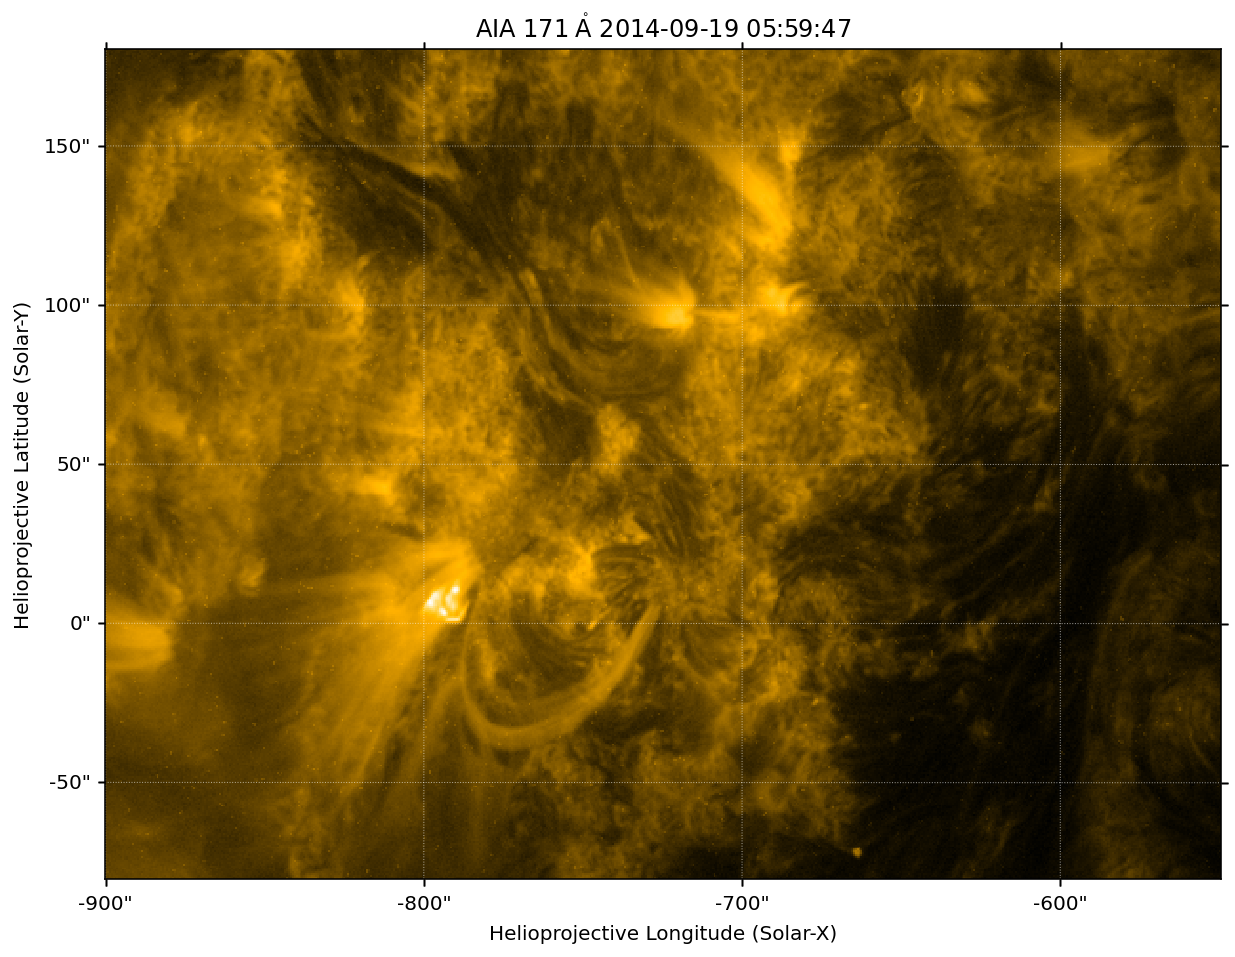

In [9]:
top_right = SkyCoord(-550*u.arcsec, 180*u.arcsec, frame=aia1.coordinate_frame)
bottom_left = SkyCoord(-900 * u.arcsec, -80. * u.arcsec, frame=aia1.coordinate_frame)
aia_sub = aia1.submap(bottom_left, top_right=top_right)
aia_sub.plot();

This `aia_sub` image is much smaller than the original.

## Using multiple channels

Now let us use the power of AIA and look at the same solar region, but closer to the photosphere. Let's search for and download the 1700 channel at about the same time:

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

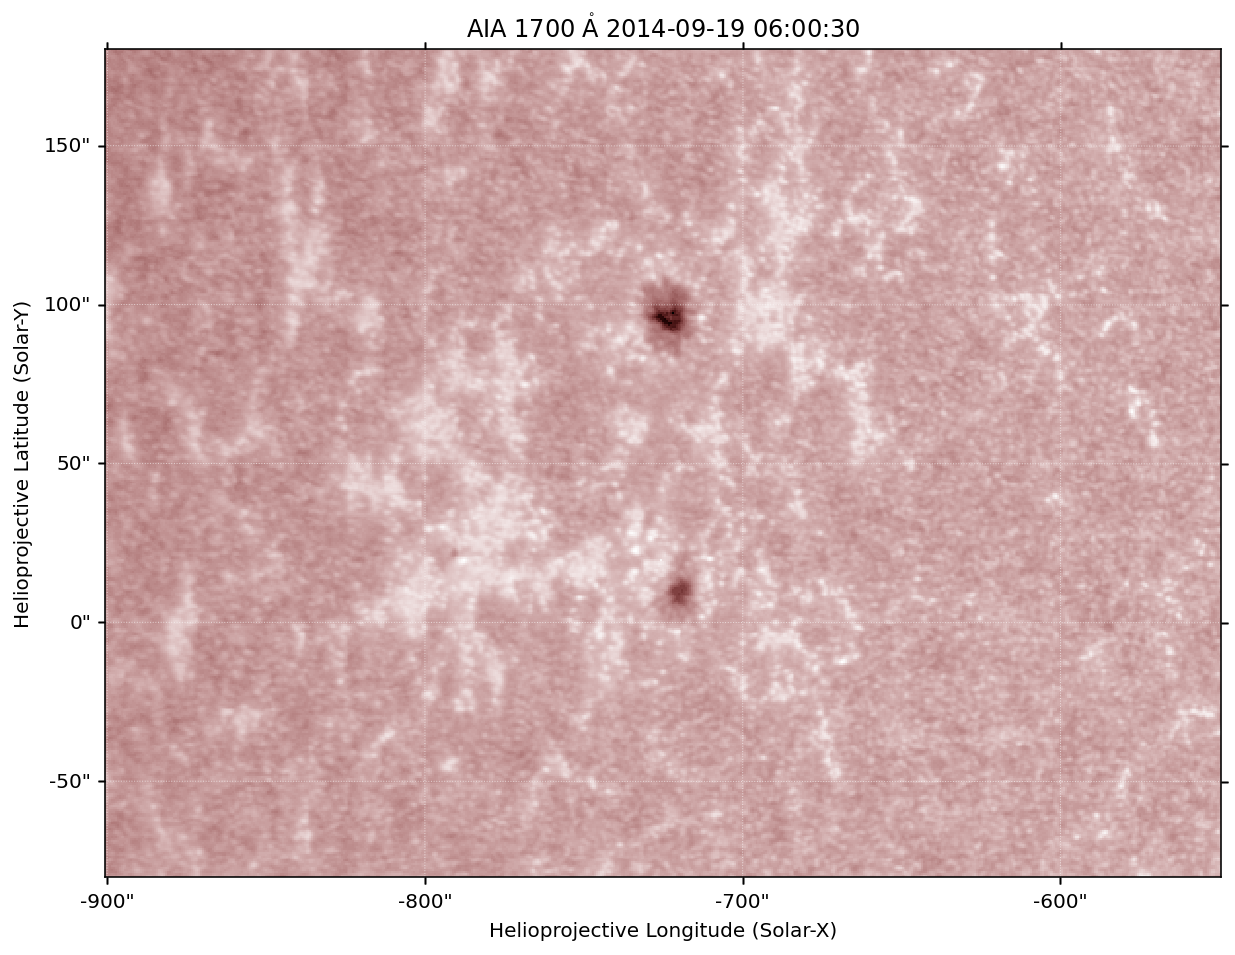

In [10]:
result = Fido.search(a.Time('2014-09-19T05:59:00', '2014-09-19T06:01:00'), 
                     a.Instrument("aia"), a.Wavelength(1700 * u.angstrom), 
                     a.Sample(12 * u.second))
# result closest in time to the 171 image:
file_download = Fido.fetch(result[0, 2])
aia1700 = sunpy.map.Map(file_download[0])
aia1700_sub = aia1700.submap(bottom_left, top_right=top_right)
aia1700_sub.plot()

Now you can see the sunspots! This 1700 image is a lot closer to the visible surface. It shows sunspots and also bright regions, which are caused by large magnetic fields. The 171 and 1700 images are so far apart that it is difficult to find common parts. We can use matplotlib to animate in between the two images:

In [11]:
fig = plt.figure()
ax = fig.add_subplot(projection=aia1700_sub)
im1 = aia1700_sub.plot(axes=ax)
im2 = aia_sub.plot(axes=ax, autoalign=True)

# add last image twice to avoid quick looping
anim = animation.ArtistAnimation(fig, [[im1], [im2], [im1]], 
                                 interval=1000, blit=True)
plt.close(fig)
HTML(anim.to_html5_video())